# Libraries import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
import rdkit
from rdkit.Chem import QED
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
kinaz_mol = pd.read_excel('Molecules_generated_tensor_scaling_0_2.xlsx')

In [3]:
kinaz_mol.shape

(78, 2)

In [4]:
smiles = kinaz_mol['SMILES_From_Tensor_rotation']
smiles.head()

0         CCC(=O)NCC(C1)=NN=C(C=C(C)C=CC(OC)=N)S1
1      CCC(=O)NCC1=CC=NN1SC=C(C2=CC=CC=C2F)[NH1]N
2             C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C
3           CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1
4    CCC(=O)NCC1=CC=NN1SC2=C(C3=CC=CC=C3F)N[NH1]2
Name: SMILES_From_Tensor_rotation, dtype: object

In [5]:
new_set0 = kinaz_mol['SMILES_From_Tensor_rotation'].to_list()

In [6]:
dff_15 = pd.DataFrame(new_set0,columns=['SMILES'])
dff_15.shape

(78, 1)

# Duplicates deletion

In [7]:
dff_17 = dff_15.drop_duplicates()
dff_17.shape

(78, 1)

In [8]:
new_set1 = dff_17['SMILES'].to_list()
new_set1[0]

'CCC(=O)NCC(C1)=NN=C(C=C(C)C=CC(OC)=N)S1'

# Seeing of the first structure

In [9]:
structure =  Chem.MolFromSmiles(new_set1[2])

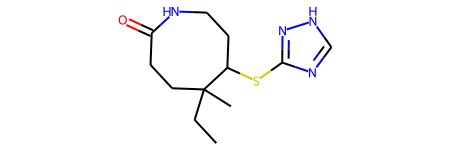

In [10]:
structure

# Calculation of the QED descriptors

In [11]:
QED_list = []
for smiles in new_set1:
    QED_list.append(QED.properties(Chem.MolFromSmiles(smiles)))

In [12]:
QED_list[0]

QEDproperties(MW=308.407, ALOGP=2.14007, HBA=3, HBD=2, PSA=86.9, ROTB=6, AROM=0, ALERTS=3)

# Preparation of the generated QED descriptors to the dataframe

In [13]:
df = pd.DataFrame.from_records(QED_list, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])

In [14]:
df.head()

,Molecular weight,alogP,HBacceptors,HBdonors,Polar surface area,rotatable bonds,aromatics rings,alerts
0,308.407,2.14007,3,2,86.90,6,0,3
1,335.408,2.00660,5,3,84.97,7,2,2
2,268.386,1.98180,4,2,70.67,3,1,0
3,248.286,1.37517,3,3,90.86,4,1,1
4,333.392,2.92700,3,3,78.50,6,3,0


# the histogram of the molecular weight distribution

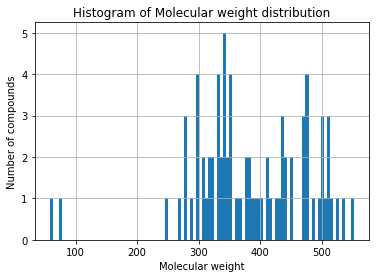

count     78.000000
mean     384.113962
std       93.527477
min       58.040000
25%      331.296500
50%      376.398000
75%      464.644250
max      552.731000
Name: Molecular weight, dtype: float64
Kurtosis:
1.6878
Skewness:
-0.7177


In [15]:
plt.hist(df['Molecular weight'],bins=100)
plt.xlabel('Molecular weight')
plt.ylabel('Number of compounds')
plt.title('Histogram of Molecular weight distribution')
plt.grid(True)
plt.show()

print(df['Molecular weight'].describe())
print('Kurtosis:')
print(round(df['Molecular weight'].kurtosis(),4))
print('Skewness:')
print(round(df['Molecular weight'].skew(),4))

# the histogram of the octanol-water partition coefficient distribution

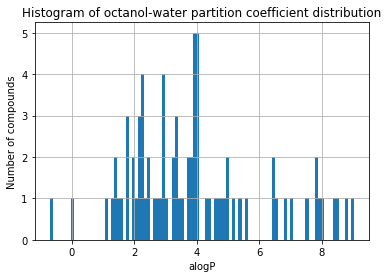

count    78.000000
mean      3.894427
std       2.146710
min      -0.706200
25%       2.309850
50%       3.606030
75%       4.838500
max       9.031100
Name: alogP, dtype: float64
Kurtosis:
0.0045
Skewness:
0.6873


In [16]:
plt.hist(df['alogP'],bins=100)
plt.xlabel('alogP')
plt.ylabel('Number of compounds')
plt.title('Histogram of octanol-water partition coefficient distribution')
plt.grid(True)
plt.show()

print(df['alogP'].describe())
print('Kurtosis:')
print(round(df['alogP'].kurtosis(),4))
print('Skewness:')
print(round(df['alogP'].skew(),4))

# the histogram of the hydrogen bonding acceptors number distribution

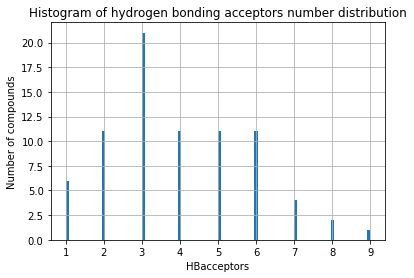

count    78.000000
mean      3.961538
std       1.861729
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       9.000000
Name: HBacceptors, dtype: float64
Kurtosis:
-0.3596
Skewness:
0.454


In [17]:
plt.hist(df['HBacceptors'],bins=100)
plt.xlabel('HBacceptors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding acceptors number distribution')
plt.grid(True)
plt.show()

print(df['HBacceptors'].describe())
print('Kurtosis:')
print(round(df['HBacceptors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBacceptors'].skew(),4))

# the histogram of the hydrogen bonding donors number distribution

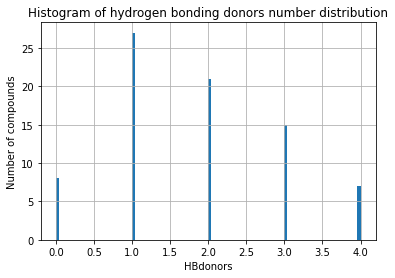

count    78.000000
mean      1.820513
std       1.136680
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: HBdonors, dtype: float64
Kurtosis:
-0.7059
Skewness:
0.3088


In [18]:
plt.hist(df['HBdonors'],bins=100)
plt.xlabel('HBdonors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding donors number distribution')
plt.grid(True)
plt.show()

print(df['HBdonors'].describe())
print('Kurtosis:')
print(round(df['HBdonors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBdonors'].skew(),4))

# the histogram of the polar surface area distribution

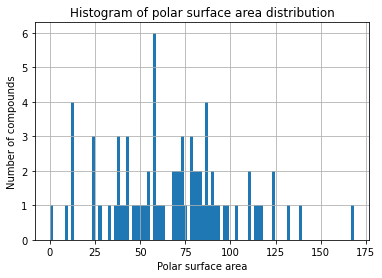

count     78.000000
mean      68.250897
std       32.946849
min        0.000000
25%       43.820000
50%       70.405000
75%       87.140000
max      168.510000
Name: Polar surface area, dtype: float64
Kurtosis:
0.2476
Skewness:
0.2936


In [19]:
plt.hist(df['Polar surface area'],bins=100)
plt.xlabel('Polar surface area')
plt.ylabel('Number of compounds')
plt.title('Histogram of polar surface area distribution')
plt.grid(True)
plt.show()

print(df['Polar surface area'].describe())
print('Kurtosis:')
print(round(df['Polar surface area'].kurtosis(),4))
print('Skewness:')
print(round(df['Polar surface area'].skew(),4))

# the histogram of the rotatable bonds number distribution

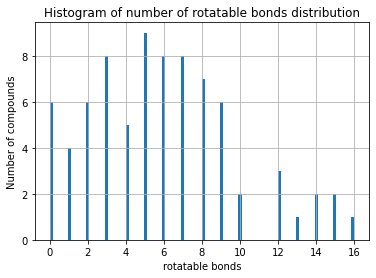

count    78.000000
mean      5.923077
std       3.917225
min       0.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      16.000000
Name: rotatable bonds, dtype: float64
Kurtosis:
-0.0173
Skewness:
0.5887


In [20]:
plt.hist(df['rotatable bonds'],bins=100)
plt.xlabel('rotatable bonds')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of rotatable bonds distribution')
plt.grid(True)
plt.show()

print(df['rotatable bonds'].describe())
print('Kurtosis:')
print(round(df['rotatable bonds'].kurtosis(),4))
print('Skewness:')
print(round(df['rotatable bonds'].skew(),4))

# the histogram of the aromatics rings number distribution

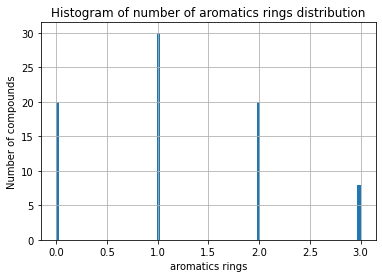

count    78.000000
mean      1.205128
std       0.944691
min       0.000000
25%       0.250000
50%       1.000000
75%       2.000000
max       3.000000
Name: aromatics rings, dtype: float64
Kurtosis:
-0.7716
Skewness:
0.3326


In [21]:
plt.hist(df['aromatics rings'],bins=100)
plt.xlabel('aromatics rings')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of aromatics rings distribution')
plt.grid(True)
plt.show()

print(df['aromatics rings'].describe())
print('Kurtosis:')
print(round(df['aromatics rings'].kurtosis(),4))
print('Skewness:')
print(round(df['aromatics rings'].skew(),4))

# QED descriptor

Drug-Like (QED):

    - mass < 400
    
    - ring count > 0
    
    - rotatable bond count < 5
    
    - h-bond donor count <= 5
    
    - h-bond acceptor count <= 10
    
    - logP < 5
    
QED is calculated from weighted sum of ADS of mapped properties:
WEIGHT_MEAN = QEDproperties( MW = 0.66, ALOGP = 0.46, HBA = 0.05, HBD = 0.61, PSA = 0.06, ROTB = 0.65, AROM = 0.48, ALERTS = 0.95 )

https://github.com/kevinid/molecule_generator/blob/master/rdkit_contrib/qed.py
Function is described here...


In [22]:
QED_list_QED = []
for smiles in new_set1:
    QED_list_QED.append(QED.qed(Chem.MolFromSmiles(smiles)))

In [23]:
QED_list_QED[0]

0.4475496144157611

In [24]:
df_QED = pd.DataFrame(QED_list_QED, columns = ['Quantitative Estimation of Drug-likeness'])

In [25]:
df_QED.head()

,Quantitative Estimation of Drug-likeness
0,0.447550
1,0.532295
2,0.879117
3,0.702774
4,0.648847


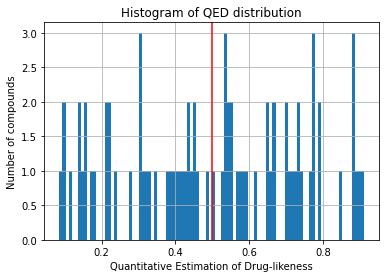

count    78.000000
mean      0.497461
std       0.236723
min       0.085704
25%       0.308729
50%       0.513035
75%       0.701894
max       0.910755
Name: Quantitative Estimation of Drug-likeness, dtype: float64
Kurtosis:
-1.059
Skewness:
-0.0409


In [26]:
plt.hist(df_QED['Quantitative Estimation of Drug-likeness'],bins=100)
plt.xlabel('Quantitative Estimation of Drug-likeness')
plt.ylabel('Number of compounds')
plt.title('Histogram of QED distribution')
plt.axvline(x=0.5, color='r')
plt.grid(True)
plt.show()

print(df_QED['Quantitative Estimation of Drug-likeness'].describe())
print('Kurtosis:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].kurtosis(),4))
print('Skewness:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].skew(),4))

# Combination of SMILES with QED value

In [27]:
dff_15['QED'] = QED_list_QED

In [28]:
dff_15.head()

,SMILES,QED
0,CCC(=O)NCC(C1)=NN=C(C=C(C)C=CC(OC)=N)S1,0.447550
1,CCC(=O)NCC1=CC=NN1SC=C(C2=CC=CC=C2F)[NH1]N,0.532295
2,C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C,0.879117
3,CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1,0.702774
4,CCC(=O)NCC1=CC=NN1SC2=C(C3=CC=CC=C3F)N[NH1]2,0.648847


In [29]:
df_QED_above_0_6 = dff_15.loc[dff_15['QED'] > 0.5] #0.6

In [30]:
len(df_QED_above_0_6['QED'])

39

# Lipinski's rule of 5

Lipinski:

    - Moleculer Weight <= 500
    
    - LogP <= 5
    
    - H-Bond Donor Count <= 5
    
    - H-Bond Acceptor Count <= 10
    
    - Rotatable bonds <= 5

In [31]:
dff_15['molecular_weight'] = [Descriptors.ExactMolWt(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['logp'] = [Descriptors.MolLogP(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['h_bond_donors'] = [Descriptors.NumHDonors(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['h_bond_acceptors'] = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['rotatable_bonds'] = [Descriptors.NumRotatableBonds(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]

In [32]:
dff_15.head()

,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds
0,CCC(=O)NCC(C1)=NN=C(C=C(C)C=CC(OC)=N)S1,0.447550,308.130697,2.14007,2,6,6
1,CCC(=O)NCC1=CC=NN1SC=C(C2=CC=CC=C2F)[NH1]N,0.532295,335.121609,2.00660,3,6,7
2,C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C,0.879117,268.135782,1.98180,2,4,3
3,CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1,0.702774,248.127326,1.37517,3,4,4
4,CCC(=O)NCC1=CC=NN1SC2=C(C3=CC=CC=C3F)N[NH1]2,0.648847,333.105959,2.92700,3,4,6


In [33]:
# Lipinski
dff_15['Lipinski Rule of 5'] = 0
for element in range(len(dff_15)):
    
    if dff_15['molecular_weight'][element] <= 500 and dff_15['logp'][element] <= 5 and dff_15['h_bond_donors'][element] <= 5 and dff_15['h_bond_acceptors'][element] <= 10 and dff_15['rotatable_bonds'][element] <= 5:
        lipinski = True
        dff_15["Lipinski Rule of 5"][element] = 1
    else:
        dff_15["Lipinski Rule of 5"][element] = 0

In [34]:
dff_15.head()

,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Lipinski Rule of 5
0,CCC(=O)NCC(C1)=NN=C(C=C(C)C=CC(OC)=N)S1,0.447550,308.130697,2.14007,2,6,6,0
1,CCC(=O)NCC1=CC=NN1SC=C(C2=CC=CC=C2F)[NH1]N,0.532295,335.121609,2.00660,3,6,7,0
2,C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C,0.879117,268.135782,1.98180,2,4,3,1
3,CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1,0.702774,248.127326,1.37517,3,4,4,1
4,CCC(=O)NCC1=CC=NN1SC2=C(C3=CC=CC=C3F)N[NH1]2,0.648847,333.105959,2.92700,3,4,6,0


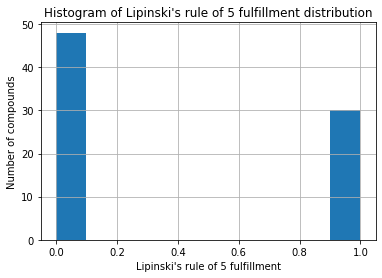

count    78.000000
mean      0.384615
std       0.489653
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Lipinski Rule of 5, dtype: float64
Kurtosis:
-1.8132
Skewness:
0.4837


In [35]:
plt.hist(dff_15['Lipinski Rule of 5'],bins=10)
plt.xlabel("Lipinski's rule of 5 fulfillment")
plt.ylabel('Number of compounds')
plt.title("Histogram of Lipinski's rule of 5 fulfillment distribution")
plt.grid(True)
plt.show()

print(dff_15['Lipinski Rule of 5'].describe())
print('Kurtosis:')
print(round(dff_15['Lipinski Rule of 5'].kurtosis(),4))
print('Skewness:')
print(round(dff_15['Lipinski Rule of 5'].skew(),4))

In [36]:
print("Number of structures that do not fulfilled Lipinski's rule of 5 is: "+str(len(dff_15[dff_15['Lipinski Rule of 5'] ==0])))

Number of structures that do not fulfilled Lipinski's rule of 5 is: 48


In [37]:
print("Number of structures that fulfilled Lipinski's rule of 5 is: "+str(len(dff_15[dff_15['Lipinski Rule of 5'] ==1])))

Number of structures that fulfilled Lipinski's rule of 5 is: 30


In [38]:
to_excel = dff_15[(dff_15['QED'] > 0.5) & (dff_15['Lipinski Rule of 5'] == 1)] #0.6
QED_list = [QED.properties(Chem.MolFromSmiles(smiles)) for smiles in to_excel['SMILES']]
df = pd.DataFrame.from_records(QED_list, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])
to_excel = to_excel.reset_index()
to_excel['Polar surface area'] = df['Polar surface area']
to_excel['aromatics rings'] = df['aromatics rings']
to_excel['Lipinski alerts - to QED calc'] = df['alerts']

In [39]:
column_order = ['SMILES', 'molecular_weight', 'logp', 'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'Polar surface area', 'aromatics rings', 'Lipinski alerts - to QED calc', 'Lipinski Rule of 5', 'QED']

In [40]:
to_excel = to_excel[column_order]

In [41]:
to_excel.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C,268.135782,1.98180,2,4,3,70.67,1,0,1,0.879117
1,CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1,248.127326,1.37517,3,4,4,90.86,1,1,1,0.702774
2,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2,333.105959,2.13020,2,5,5,71.31,2,0,1,0.880428
3,CCC(=O)NCC1=C2N=C(CC3=N[NH1]C(C)=C3Cl)N1CC2,307.119988,1.74112,2,4,5,75.60,2,0,1,0.883228
4,CCC(=O)NCC(F)C1=NSC(C2=CC=CC=N2)=N1,280.079410,2.13690,1,5,5,67.77,2,0,1,0.910755


In [42]:
print("Number of structures that fulfilled QED threshold and Lipinski's rule of 5 is: "+str(len(to_excel)))

Number of structures that fulfilled QED threshold and Lipinski's rule of 5 is: 25


## Percentage of structures that fulfilled given restrictions from all generated using method given in file title

In [43]:
print("Percentage of molecules that fulfilled restrictions: "+str((round(len(to_excel)*100/len(dff_15),2)))+'%.')

Percentage of molecules that fulfilled restrictions: 32.05%.


In [44]:
to_excel.to_excel('Selected_molecules_from_0_2_tensor_scaling.xlsx')